In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from tqdm import tqdm

import torch
import timm
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models

# For EfficientNet
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet


In [4]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# === CONFIG ===
csv_path = '/content/drive/MyDrive/data_images/vott-csv-export/sorted_output_file.csv'  # CSV file with YOLO predictions
images_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/train'            # Original images folder
output_dir = '/content/drive/MyDrive/data_images/csv/sam/train'   # Output folder for cropped images
os.makedirs(output_dir, exist_ok=True)

# === LOAD CSV ===
df = pd.read_csv(csv_path)

# Add sub-index per image for unique cropping numbering
df['sub_index'] = df.groupby('image').cumcount()

# === CROP AND SAVE ===
for idx, row in tqdm(df.iterrows(), total=len(df), desc='Cropping images'):
    image_path = os.path.join(images_dir, row['image'])

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Could not read {image_path}")
        continue

    # Get box coordinates
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Crop the region
    crop = image[ymin:ymax, xmin:xmax]

    # Build unique filename for each crop
    base_name = os.path.splitext(row['image'])[0]
    crop_name = f"{base_name}_{row['sub_index']}.jpg"
    crop_path = os.path.join(output_dir, crop_name)

    # Save cropped image
    cv2.imwrite(crop_path, crop)

print(f"Saved all cropped images to: {output_dir}")


Cropping images:   1%|          | 12/2225 [00:05<15:42,  2.35it/s]

Cropping images:   3%|▎         | 68/2225 [00:07<00:44, 47.97it/s]

Cropping images:  14%|█▎        | 301/2225 [00:14<00:16, 117.69it/s]

Cropping images:  18%|█▊        | 402/2225 [00:18<00:38, 47.31it/s]

Cropping images:  21%|██        | 460/2225 [00:21<01:40, 17.58it/s]

Cropping images:  25%|██▌       | 566/2225 [00:27<01:00, 27.52it/s]

Cropping images:  28%|██▊       | 618/2225 [00:28<00:49, 32.53it/s]

Cropping images:  40%|███▉      | 883/2225 [00:42<00:40, 33.49it/s]

Cropping images:  47%|████▋     | 1045/2225 [00:54<00:57, 20.68it/s]

Cropping images:  51%|█████     | 1129/2225 [00:59<00:55, 19.75it/s]

Cropping images:  53%|█████▎    | 1185/2225 [01:03<01:45,  9.88it/s]

Cropping images:  54%|█████▎    | 1195/2225 [01:04<01:28, 11.68it/s]

Cropping images:  57%|█████▋    | 1259/2225 [01:09<01:42,  9.42it/s]

Cropping images:  57%|█████▋    | 1264/2225 [01:10<01:46,  9.02it/s]

Cropping images:  58%|█████▊    | 1295/2225 [01:14<02:00,  7.74it/s]

Cropping images:  59%|█████▉    | 1311/2225 [01:17<02:59,  5.10it/s]

Cropping images:  59%|█████▉    | 1321/2225 [01:18<02:41,  5.60it/s]

Cropping images:  60%|██████    | 1338/2225 [01:20<01:18, 11.29it/s]

Cropping images:  61%|██████    | 1353/2225 [01:22<02:05,  6.94it/s]

Cropping images:  61%|██████▏   | 1368/2225 [01:23<01:07, 12.61it/s]

Cropping images:  62%|██████▏   | 1390/2225 [01:24<00:41, 20.17it/s]

Cropping images:  63%|██████▎   | 1402/2225 [01:24<00:40, 20.13it/s]

Cropping images:  64%|██████▍   | 1419/2225 [01:25<00:33, 24.16it/s]

Cropping images:  65%|██████▌   | 1451/2225 [01:27<01:04, 12.06it/s]

Cropping images:  68%|██████▊   | 1521/2225 [01:37<01:35,  7.33it/s]

Cropping images:  70%|██████▉   | 1555/2225 [01:39<00:44, 15.08it/s]

Cropping images:  71%|███████▏  | 1586/2225 [01:42<01:08,  9.29it/s]

Cropping images:  73%|███████▎  | 1620/2225 [01:45<00:39, 15.35it/s]

Cropping images:  74%|███████▎  | 1639/2225 [01:46<00:26, 21.90it/s]

Cropping images:  77%|███████▋  | 1713/2225 [01:53<00:35, 14.56it/s]

Cropping images:  78%|███████▊  | 1741/2225 [01:55<00:33, 14.35it/s]

Cropping images:  80%|████████  | 1790/2225 [02:01<01:26,  5.01it/s]

Cropping images:  81%|████████  | 1794/2225 [02:02<01:13,  5.90it/s]

Cropping images:  81%|████████  | 1807/2225 [02:04<01:02,  6.70it/s]

Cropping images:  82%|████████▏ | 1827/2225 [02:09<01:08,  5.79it/s]

Cropping images:  82%|████████▏ | 1831/2225 [02:09<01:05,  6.03it/s]

Cropping images:  83%|████████▎ | 1845/2225 [02:12<01:21,  4.66it/s]

Cropping images:  84%|████████▍ | 1864/2225 [02:18<02:25,  2.49it/s]

Cropping images:  84%|████████▍ | 1871/2225 [02:20<01:43,  3.42it/s]

Cropping images:  85%|████████▍ | 1888/2225 [02:23<01:13,  4.59it/s]

Cropping images:  85%|████████▌ | 1895/2225 [02:24<00:41,  7.94it/s]

Cropping images:  87%|████████▋ | 1939/2225 [02:30<00:31,  9.12it/s]

Cropping images:  89%|████████▉ | 1991/2225 [02:32<00:10, 21.91it/s]

Cropping images:  91%|█████████▏| 2032/2225 [02:37<00:29,  6.46it/s]

Cropping images:  94%|█████████▎| 2081/2225 [02:41<00:11, 13.04it/s]

Cropping images:  95%|█████████▍| 2110/2225 [02:42<00:06, 16.66it/s]

Cropping images:  96%|█████████▌| 2129/2225 [02:44<00:07, 12.68it/s]

Cropping images: 100%|██████████| 2225/2225 [02:49<00:00, 13.09it/s]

Saved all cropped images to: /content/drive/MyDrive/data_images/csv/sam/train


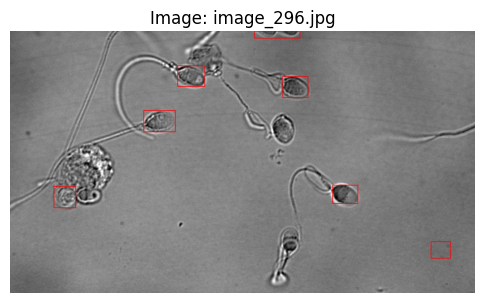

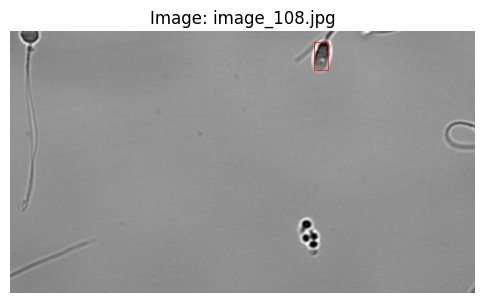

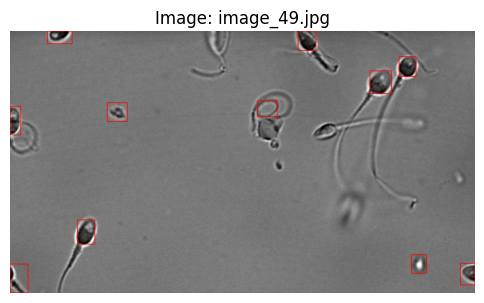

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

# Paths
image_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/val'
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/sam_output_boxes.csv'

# Read CSV
df = pd.read_csv(csv_path)

# List of specific image filenames to display
selected_images = ['image_296.jpg', 'image_108.jpg', 'image_49.jpg']

# Display each selected image with bounding boxes
for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Image not found: {img_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Filter the bounding boxes for the current image
    boxes = df[df['image_name'] == img_name]

    # Draw bounding boxes
    for _, row in boxes.iterrows():
        x_min, y_min, x_max, y_max = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)

    # Show the image with boxes
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Image: {img_name}")
    plt.axis('off')
    plt.show()


In [9]:
import os
import pandas as pd
from PIL import Image

# Paths
image_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/val'         # Update to your image directory
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/sam_output_boxes.csv'  # Update to your CSV file path
output_dir = '/content/drive/MyDrive/data_images/csv/sam/val_crope_sam' # Update to your output directory

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Read CSV
df = pd.read_csv(csv_path)

# Iterate through each row in the DataFrame
for idx, row in df.iterrows():
    image_name, xmin, ymin, xmax, ymax = row['image_name'], row['x_min'], row['y_min'], row['x_max'], row['y_max']
    image_path = os.path.join(image_dir, image_name)

    if os.path.exists(image_path):
        # Open the image
        image = Image.open(image_path)

        # Crop the image
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Save the cropped image
        cropped_filename = f"{os.path.splitext(image_name)[0]}_{idx}.jpg"
        cropped_image.save(os.path.join(output_dir, cropped_filename))
        print(f"Cropped image saved for: {cropped_filename}")
    else:
        print(f"Image not found: {image_path}")


Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_1.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_1.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_1.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_10.jpg
Image not found: /conten

In [10]:
# Load CSV
df = pd.read_csv('/content/drive/MyDrive/data_images/yolo_dataset/images/sam_output_boxes.csv')
print(df.columns)
print(df.head())

Index(['image_name', 'box_id', 'x_min', 'y_min', 'x_max', 'y_max'], dtype='object')
     image_name  box_id  x_min  y_min  x_max  y_max
0   image_1.jpg       0    701    499    777    602
1   image_1.jpg       1    125    473    228    582
2   image_1.jpg       2    662    142    744    253
3  image_10.jpg       0    468    110    542    188
4  image_10.jpg       1   1510    644   1599    722


In [12]:
import os

print("Train Folder Samples:")
print(os.listdir('/content/drive/MyDrive/data_images/csv/sam/train')[:5])

print("\nVal Folder Samples:")
print(os.listdir('/content/drive/MyDrive/data_images/csv/sam/val_crope_sam')[:5])


Train Folder Samples:
['image_1_0.jpg', 'image_1_1.jpg', 'image_1_2.jpg', 'image_1_3.jpg', 'image_2_0.jpg']

Val Folder Samples:
['image_100_20.jpg', 'image_100_21.jpg', 'image_100_22.jpg', 'image_100_23.jpg', 'image_100_24.jpg']


In [13]:
df = pd.read_csv(csv_path)
print(df.columns.tolist())


['image_name', 'box_id', 'x_min', 'y_min', 'x_max', 'y_max']


In [16]:
import os
import pandas as pd

# Define paths
train_dir = '/content/drive/MyDrive/data_images/csv/sam/train'  # Update if needed
val_dir = '/content/drive/MyDrive/data_images/csv/sam/val_crope_sam'      # Update if needed

# Load CSV
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/sam_output_boxes.csv'
df = pd.read_csv(csv_path)

# Get file lists
train_files = os.listdir(train_dir)
val_files = os.listdir(val_dir)

# Add a column with base filename without extension
df['base_name'] = df['image_name'].str.replace(r'\.jpg$', '', regex=True)

# Filter train samples: keep rows where any train file starts with base_name + '_'
df_train = df[df['base_name'].apply(lambda x: any(f.startswith(x + '_') for f in train_files))]

# Filter val samples: same logic
df_val = df[df['base_name'].apply(lambda x: any(f.startswith(x + '_') for f in val_files))]

print(f"Filtered train samples: {len(df_train)}")
print(f"Filtered val samples: {len(df_val)}")


Filtered train samples: 1806
Filtered val samples: 481


In [18]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
base_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Base path for images
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/sam_output_boxes.csv'  # CSV file path
output_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Output directory path

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Read CSV annotations
annotations = pd.read_csv(csv_path)

# List to store results
dfi_values = []

# Loop through each annotation
for idx, row in annotations.iterrows():
    image_name, xmin, ymin, xmax, ymax = row['image_name'], row['x_min'], row['y_min'], row['x_max'], row['y_max']

    # Remove underscore from image name (e.g., image_1 → image1)
    image_name = image_name.replace('_', '')

    # Remove file extension if present
    image_name = os.path.splitext(image_name)[0]

    # Build paths with correct capitalization in folder names
    green_train_path = os.path.join(base_dir, 'Green', 'train', f"{image_name}.jpg")
    red_train_path = os.path.join(base_dir, 'Red', 'train', f"{image_name}.jpg")

    green_val_path = os.path.join(base_dir, 'Green', 'val', f"{image_name}.jpg")
    red_val_path = os.path.join(base_dir, 'Red', 'val', f"{image_name}.jpg")

    print(f"Looking for:\n  Green Train Path: {green_train_path}\n  Red Train Path: {red_train_path}")
    print(f"  Green Val Path: {green_val_path}\n  Red Val Path: {red_val_path}")

    # Check if files exist in train or val
    if os.path.exists(green_train_path) and os.path.exists(red_train_path):
        green_image_path = green_train_path
        red_image_path = red_train_path
        dataset = 'train'
    elif os.path.exists(green_val_path) and os.path.exists(red_val_path):
        green_image_path = green_val_path
        red_image_path = red_val_path
        dataset = 'val'
    else:
        print(f"❌ Image pair not found for {image_name}")
        continue

    # Load images in grayscale
    green_image = cv2.imread(green_image_path, cv2.IMREAD_GRAYSCALE)
    red_image = cv2.imread(red_image_path, cv2.IMREAD_GRAYSCALE)

    if green_image is None or red_image is None:
        print(f"❌ Failed to load images for {image_name}")
        continue

    # Convert coordinates to int (slice indices must be integers)
    xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

    # Crop the region of interest
    green_crop = green_image[ymin:ymax, xmin:xmax]
    red_crop = red_image[ymin:ymax, xmin:xmax]

    # Sum pixel intensities in cropped region
    green_sum = np.sum(green_crop)
    red_sum = np.sum(red_crop)

    # Calculate DFI (avoid division by zero)
    dfi = (red_sum / (green_sum + red_sum)) if (green_sum + red_sum) > 0 else 0

    # Store results
    dfi_values.append((image_name, xmin, ymin, xmax, ymax, dfi, dataset))
    print(f"✅ Processed {image_name} in {dataset}: DFI = {dfi:.3f}")

# Save results to CSV
dfi_df = pd.DataFrame(dfi_values, columns=['Image Name', 'xmin', 'ymin', 'xmax', 'ymax', 'DFI', 'Dataset'])
dfi_df.to_csv(os.path.join(output_dir, 'DFI_results_sam.csv'), index=False)

print("\nDFI calculation completed and saved to DFI_results.csv")


Streaming output truncated to the last 5000 lines.
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image31.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image31.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image31.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image31.jpg
✅ Processed image31 in train: DFI = 0.098
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image31.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image31.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image31.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image31.jpg
✅ Processed image31 in train: DFI = 0.097
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image31.jpg
  Red Train Path: /content/dri

In [19]:
import pandas as pd
import re

# Load CSV
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_sam_1.csv'
df = pd.read_csv(csv_path)

# Ensure 'filename' column exists
if 'filename' not in df.columns:
    def fix_filename(name):
        fixed = re.sub(r'^image(\d+)', r'image_\1', name)
        return fixed + '.jpg'
    df['filename'] = df['Image Name'].apply(fix_filename)

# Create binary DFI classification (low < 0.08, high > 0.11)
def classify_dfi(dfi):
    try:
        dfi = float(dfi)
    except:
        return None
    if dfi < 0.08:
        return 'low'
    elif dfi > 0.11:
        return 'high'
    else:
        return None  # discard values between 0.1 and 0.15

# Apply classification and drop intermediate values
df['dfi_class'] = df['DFI'].apply(classify_dfi)
df = df.dropna(subset=['dfi_class'])

# Separate train and val sets
df_train = df[df['Dataset'] == 'train']
df_val = df[df['Dataset'] == 'val']

# Count samples per class for train
train_counts = df_train['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in TRAIN set:")
print(train_counts)

print("\n---------------------------\n")

# Count samples per class for val
val_counts = df_val['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in VAL set:")
print(val_counts)

# Optional: Save the updated CSV
updated_csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_sam_1.csv'
df.to_csv(updated_csv_path, index=False)


✅ Number of samples per DFI class in TRAIN set:
dfi_class
high    741
low     644
Name: count, dtype: int64

---------------------------

✅ Number of samples per DFI class in VAL set:
dfi_class
high    196
low     179
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_sam.csv'
df = pd.read_csv(csv_path)

# Remove .jpg extension from image_name
df['image_base'] = df['Image Name'].str.replace('.jpg', '', regex=False)

# Add a global counter based on index
df.reset_index(inplace=True)
df['filename'] = df.apply(lambda row: f"{row['image_base']}_{row['index']}", axis=1)

# Drop temporary columns
df.drop(columns=['index', 'image_base'], inplace=True)

# Save the modified CSV
df.to_csv('/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_sam.csv', index=False)

print("Image names updated successfully without .jpg extension.")


Image names updated successfully without .jpg extension.


In [ ]:
import re

# Fix filename to match actual image files
def normalize_filename(name):
    return re.sub(r'^image(\d+)', r'image_\1', name) + '.jpg'

# Apply fix to CSV
df['filename_jpg'] = df['filename'].apply(normalize_filename)


In [ ]:
print("📄 Sample rows from CSV:")
print(df[['filename_jpg', 'Dataset']].head(10))


📄 Sample rows from CSV:
     filename_jpg Dataset
0   image_1_0.jpg   train
1   image_1_1.jpg   train
2   image_1_2.jpg   train
3  image_10_3.jpg   train
4  image_10_4.jpg   train
5  image_10_5.jpg   train
6  image_10_6.jpg   train
7  image_10_7.jpg   train
8  image_10_8.jpg   train
9  image_10_9.jpg   train


In [ ]:
import os

# Show a few filenames from train and val folders
print("📁 Sample train files:")
print(sorted(os.listdir(train_dir))[:10])

print("\n📁 Sample val files:")
print(sorted(os.listdir(val_dir))[:10])


📁 Sample train files:
['image_101_26.jpg', 'image_101_27.jpg', 'image_101_28.jpg', 'image_101_29.jpg', 'image_101_30.jpg', 'image_102_31.jpg', 'image_102_32.jpg', 'image_102_33.jpg', 'image_103_34.jpg', 'image_103_35.jpg']

📁 Sample val files:
['image_100_20.jpg', 'image_100_21.jpg', 'image_100_22.jpg', 'image_100_23.jpg', 'image_100_24.jpg', 'image_100_25.jpg', 'image_104_37.jpg', 'image_104_38.jpg', 'image_104_39.jpg', 'image_104_40.jpg']


In [ ]:
print("🧾 Sample filename_jpg in CSV:")
print(df['filename_jpg'].unique()[:10])


🧾 Sample filename_jpg in CSV:
['image1_0.jpg' 'image1_1.jpg' 'image1_2.jpg' 'image10_3.jpg'
 'image10_4.jpg' 'image10_5.jpg' 'image10_6.jpg' 'image10_7.jpg'
 'image10_8.jpg' 'image10_9.jpg']


In [25]:
import pandas as pd
import os
import re

# Load CSV
df = pd.read_csv('/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_sam_1.csv')

# Convert 'image1_0' -> 'image_1_0.jpg'
def convert_filename(name):
    match = re.match(r'image(\d+)_(\d+)', name)
    if match:
        return f'image_{match.group(1)}_{match.group(2)}.jpg'
    return name + '.jpg'

df['filename_jpg'] = df['filename'].apply(convert_filename)

# Print a sample
print("🧾 Converted filenames:")
print(df['filename_jpg'].unique()[:10])

# Filter available files
train_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/train_crope_sam'
val_dir = '/content/drive/MyDrive/data_images/csv/sam/val_crope_sam'

train_files = set(os.listdir(train_dir))
val_files = set(os.listdir(val_dir))

df_train = df[(df['Dataset'] == 'train') & (df['filename_jpg'].isin(train_files))]
df_val = df[(df['Dataset'] == 'val') & (df['filename_jpg'].isin(val_files))]

# Save filtered CSVs
df_train.to_csv('/content/drive/MyDrive/data_images/yolo_dataset/images/train_filtered_sam.csv', index=False)
df_val.to_csv('/content/drive/MyDrive/data_images/csv/sam/val_filtered_sam.csv', index=False)

print(f"✅ Filtered train samples: {len(df_train)}")
print(f"✅ Filtered val samples: {len(df_val)}")


🧾 Converted filenames:
['image_1_2.jpg' 'image_10_3.jpg' 'image_10_5.jpg' 'image_10_6.jpg'
 'image_10_9.jpg' 'image_10_13.jpg' 'image_10_14.jpg' 'image_10_17.jpg'
 'image_10_19.jpg' 'image_100_20.jpg']
✅ Filtered train samples: 1367
✅ Filtered val samples: 375


In [23]:
df.columns = df.columns.str.strip()


In [5]:
# Paths to CSVs and image directories
train_csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
val_csv_path = '/content/drive/MyDrive/data_images/csv/sam/val_filtered_sam_1.csv'
train_img_dir = '/content/drive/MyDrive/data_images/csv/yolo_sam/train'
val_img_dir = '/content/drive/MyDrive/data_images/csv/sam/val_crope_sam'

# Load dataframes
df_train = pd.read_csv(train_csv_path)
df_val = pd.read_csv(val_csv_path)

In [6]:
import random
# Set seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)


In [7]:
# Dataset class
class DfiDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
        self.label_map = {'low': 0, 'high': 1}
        self.df['label'] = self.df['dfi_class'].map(self.label_map)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['filename'])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, row['label']


In [8]:
# Hyperparameters
dropout_rate = 0.6
batch_size = 32
num_epochs = 100
learning_rate = 1e-4
weight_decay = 1e-4  # for optimizer regularization
early_stopping_patience = 20


In [9]:
# Data augmentation and normalization
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [10]:
# Create datasets and dataloaders
train_dataset = DfiDataset(df_train, train_img_dir, transform=train_transform)
val_dataset = DfiDataset(df_val, val_img_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [11]:
# Extract all labels from the training loader
labels_train = []

for _, labels in train_loader:
    labels_train.extend(labels.numpy())  # or labels.cpu().numpy() if on GPU


In [12]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from efficientnet_pytorch import EfficientNet
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
dropout_rate = 0.6
learning_rate = 1e-4
weight_decay = 1e-5
num_epochs = 100
early_stopping_patience = 10
num_classes = 2

# Define EfficientNet-B0 model with dropout
class EfficientNetB0Classifier(nn.Module):
    def __init__(self, dropout_rate=0.6, num_classes=2):
        super().__init__()
        self.base_model = EfficientNet.from_pretrained('efficientnet-b0')
        in_features = self.base_model._fc.in_features
        self.base_model._fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

model = EfficientNetB0Classifier(dropout_rate=dropout_rate, num_classes=num_classes).to(device)

# Compute class weights from training labels (labels_train must be provided)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels_train), y=labels_train)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss >= self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=early_stopping_patience, verbose=True)

# Training epoch
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return epoch_loss, acc, prec, rec, f1

# Validation epoch
def validate_epoch(model, loader, criterion):
    model.eval()
    running_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return epoch_loss, acc, prec, rec, f1

# Metric lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
train_precisions, val_precisions = [], []
train_recalls, val_recalls = [], []
train_f1s, val_f1s = [], []

# Training loop
best_val_loss = float('inf')

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_prec, train_rec, train_f1 = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc, val_prec, val_rec, val_f1 = validate_epoch(model, val_loader, criterion)

    print(f"Epoch {epoch} | Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train - Acc: {train_acc:.4f}, Prec: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
    print(f"Val   - Acc: {val_acc:.4f}, Prec: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"✔️ Best model saved at epoch {epoch} with val_loss: {val_loss:.4f}")

    # Append metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_precisions.append(train_prec)
    val_precisions.append(val_prec)
    train_recalls.append(train_rec)
    val_recalls.append(val_rec)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)

    # Scheduler and early stopping
    scheduler.step(val_loss)
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("⏹️ Early stopping triggered.")
        break


Loaded pretrained weights for efficientnet-b0


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or 

Epoch 1 | Train Loss: 0.6106, Val Loss: 0.6748
Train - Acc: 0.6664, Prec: 0.6665, Recall: 0.6664, F1: 0.6664
Val   - Acc: 0.5520, Prec: 0.5723, Recall: 0.5520, F1: 0.4848
✔️ Best model saved at epoch 1 with val_loss: 0.6748


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2 | Train Loss: 0.5307, Val Loss: 0.6597
Train - Acc: 0.7654, Prec: 0.7659, Recall: 0.7654, F1: 0.7654
Val   - Acc: 0.5813, Prec: 0.6501, Recall: 0.5813, F1: 0.5082
✔️ Best model saved at epoch 2 with val_loss: 0.6597


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3 | Train Loss: 0.4752, Val Loss: 0.6375
Train - Acc: 0.7872, Prec: 0.7881, Recall: 0.7872, F1: 0.7871
Val   - Acc: 0.6027, Prec: 0.6583, Recall: 0.6027, F1: 0.5500
✔️ Best model saved at epoch 3 with val_loss: 0.6375


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4 | Train Loss: 0.4560, Val Loss: 0.6500
Train - Acc: 0.7816, Prec: 0.7822, Recall: 0.7816, F1: 0.7815
Val   - Acc: 0.6107, Prec: 0.6748, Recall: 0.6107, F1: 0.5581
EarlyStopping counter: 1 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5 | Train Loss: 0.4195, Val Loss: 0.6357
Train - Acc: 0.8083, Prec: 0.8083, Recall: 0.8083, F1: 0.8083
Val   - Acc: 0.6427, Prec: 0.6972, Recall: 0.6427, F1: 0.6070
✔️ Best model saved at epoch 5 with val_loss: 0.6357


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6 | Train Loss: 0.4261, Val Loss: 0.6626
Train - Acc: 0.8146, Prec: 0.8146, Recall: 0.8146, F1: 0.8146
Val   - Acc: 0.6293, Prec: 0.6889, Recall: 0.6293, F1: 0.5869
EarlyStopping counter: 1 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7 | Train Loss: 0.3963, Val Loss: 0.6376
Train - Acc: 0.8244, Prec: 0.8245, Recall: 0.8244, F1: 0.8244
Val   - Acc: 0.6480, Prec: 0.7172, Recall: 0.6480, F1: 0.6085
EarlyStopping counter: 2 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8 | Train Loss: 0.3602, Val Loss: 0.6586
Train - Acc: 0.8455, Prec: 0.8455, Recall: 0.8455, F1: 0.8455
Val   - Acc: 0.6720, Prec: 0.7214, Recall: 0.6720, F1: 0.6459
EarlyStopping counter: 3 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9 | Train Loss: 0.3622, Val Loss: 0.5956
Train - Acc: 0.8427, Prec: 0.8428, Recall: 0.8427, F1: 0.8427
Val   - Acc: 0.7147, Prec: 0.7486, Recall: 0.7147, F1: 0.7005
✔️ Best model saved at epoch 9 with val_loss: 0.5956


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10 | Train Loss: 0.3200, Val Loss: 0.5801
Train - Acc: 0.8603, Prec: 0.8603, Recall: 0.8603, F1: 0.8602
Val   - Acc: 0.7307, Prec: 0.7584, Recall: 0.7307, F1: 0.7199
✔️ Best model saved at epoch 10 with val_loss: 0.5801


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 11 | Train Loss: 0.2856, Val Loss: 0.5422
Train - Acc: 0.8834, Prec: 0.8835, Recall: 0.8834, F1: 0.8834
Val   - Acc: 0.7573, Prec: 0.7826, Recall: 0.7573, F1: 0.7493
✔️ Best model saved at epoch 11 with val_loss: 0.5422


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 12 | Train Loss: 0.2832, Val Loss: 0.6432
Train - Acc: 0.8848, Prec: 0.8851, Recall: 0.8848, F1: 0.8848
Val   - Acc: 0.7333, Prec: 0.7604, Recall: 0.7333, F1: 0.7230
EarlyStopping counter: 1 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 13 | Train Loss: 0.2807, Val Loss: 0.5802
Train - Acc: 0.8792, Prec: 0.8799, Recall: 0.8792, F1: 0.8792
Val   - Acc: 0.7387, Prec: 0.7571, Recall: 0.7387, F1: 0.7313
EarlyStopping counter: 2 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 14 | Train Loss: 0.2417, Val Loss: 0.5855
Train - Acc: 0.9003, Prec: 0.9011, Recall: 0.9003, F1: 0.9002
Val   - Acc: 0.7600, Prec: 0.7702, Recall: 0.7600, F1: 0.7560
EarlyStopping counter: 3 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 15 | Train Loss: 0.2269, Val Loss: 0.4957
Train - Acc: 0.9150, Prec: 0.9151, Recall: 0.9150, F1: 0.9150
Val   - Acc: 0.8000, Prec: 0.8003, Recall: 0.8000, F1: 0.7997
✔️ Best model saved at epoch 15 with val_loss: 0.4957


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 16 | Train Loss: 0.1927, Val Loss: 0.5408
Train - Acc: 0.9270, Prec: 0.9276, Recall: 0.9270, F1: 0.9269
Val   - Acc: 0.7973, Prec: 0.8037, Recall: 0.7973, F1: 0.7953
EarlyStopping counter: 1 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 17 | Train Loss: 0.1949, Val Loss: 0.5134
Train - Acc: 0.9129, Prec: 0.9131, Recall: 0.9129, F1: 0.9129
Val   - Acc: 0.8160, Prec: 0.8179, Recall: 0.8160, F1: 0.8152
EarlyStopping counter: 2 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 18 | Train Loss: 0.1842, Val Loss: 0.5113
Train - Acc: 0.9305, Prec: 0.9306, Recall: 0.9305, F1: 0.9305
Val   - Acc: 0.8133, Prec: 0.8138, Recall: 0.8133, F1: 0.8130
EarlyStopping counter: 3 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 19 | Train Loss: 0.1690, Val Loss: 0.5484
Train - Acc: 0.9340, Prec: 0.9343, Recall: 0.9340, F1: 0.9340
Val   - Acc: 0.8053, Prec: 0.8097, Recall: 0.8053, F1: 0.8039
EarlyStopping counter: 4 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 20 | Train Loss: 0.1700, Val Loss: 0.4969
Train - Acc: 0.9347, Prec: 0.9347, Recall: 0.9347, F1: 0.9347
Val   - Acc: 0.8107, Prec: 0.8107, Recall: 0.8107, F1: 0.8107
EarlyStopping counter: 5 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 21 | Train Loss: 0.1264, Val Loss: 0.4980
Train - Acc: 0.9515, Prec: 0.9516, Recall: 0.9515, F1: 0.9515
Val   - Acc: 0.8107, Prec: 0.8122, Recall: 0.8107, F1: 0.8108
EarlyStopping counter: 6 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 22 | Train Loss: 0.1412, Val Loss: 0.5015
Train - Acc: 0.9417, Prec: 0.9418, Recall: 0.9417, F1: 0.9417
Val   - Acc: 0.8160, Prec: 0.8185, Recall: 0.8160, F1: 0.8151
EarlyStopping counter: 7 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 23 | Train Loss: 0.1212, Val Loss: 0.5135
Train - Acc: 0.9600, Prec: 0.9600, Recall: 0.9600, F1: 0.9600
Val   - Acc: 0.8213, Prec: 0.8221, Recall: 0.8213, F1: 0.8214
EarlyStopping counter: 8 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 24 | Train Loss: 0.1214, Val Loss: 0.5235
Train - Acc: 0.9572, Prec: 0.9575, Recall: 0.9572, F1: 0.9572
Val   - Acc: 0.7947, Prec: 0.7946, Recall: 0.7947, F1: 0.7946
EarlyStopping counter: 9 out of 10


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 25 | Train Loss: 0.1150, Val Loss: 0.5344
Train - Acc: 0.9593, Prec: 0.9593, Recall: 0.9593, F1: 0.9593
Val   - Acc: 0.7840, Prec: 0.7839, Recall: 0.7840, F1: 0.7839
EarlyStopping counter: 10 out of 10
⏹️ Early stopping triggered.


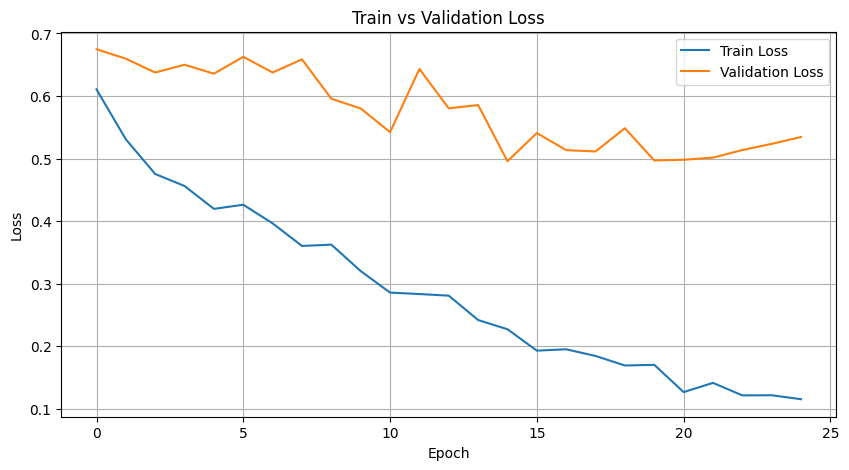


📊 Metrics per Epoch:
    Epoch  Train Acc  Val Acc  Train Prec  Val Prec  Train Recall  Val Recall  \
0       1     0.6664   0.5520      0.6665    0.5723        0.6664      0.5520   
1       2     0.7654   0.5813      0.7659    0.6501        0.7654      0.5813   
2       3     0.7872   0.6027      0.7881    0.6583        0.7872      0.6027   
3       4     0.7816   0.6107      0.7822    0.6748        0.7816      0.6107   
4       5     0.8083   0.6427      0.8083    0.6972        0.8083      0.6427   
5       6     0.8146   0.6293      0.8146    0.6889        0.8146      0.6293   
6       7     0.8244   0.6480      0.8245    0.7172        0.8244      0.6480   
7       8     0.8455   0.6720      0.8455    0.7214        0.8455      0.6720   
8       9     0.8427   0.7147      0.8428    0.7486        0.8427      0.7147   
9      10     0.8603   0.7307      0.8603    0.7584        0.8603      0.7307   
10     11     0.8834   0.7573      0.8835    0.7826        0.8834      0.7573   
11    

In [13]:
import matplotlib.pyplot as plt
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Metrics Table
results_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train Acc': train_accuracies,
    'Val Acc': val_accuracies,
    'Train Prec': train_precisions,
    'Val Prec': val_precisions,
    'Train Recall': train_recalls,
    'Val Recall': val_recalls,
    'Train F1': train_f1s,
    'Val F1': val_f1s
})
print("\n📊 Metrics per Epoch:")
print(results_df.round(4))
results_df.to_csv('/content/metrics_summary.csv', index=False)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


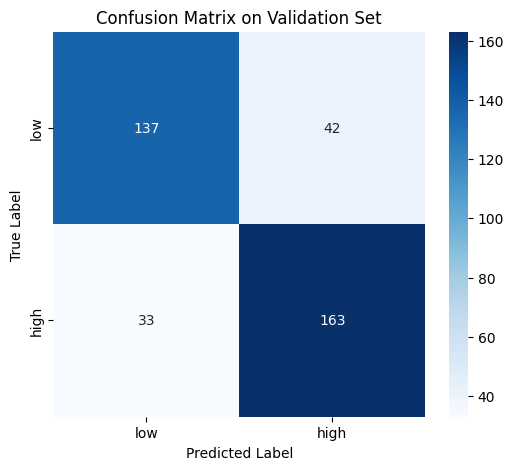

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Load best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)

# Function to get predictions and true labels from the dataloader
def get_preds_and_labels(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    return all_preds, all_labels

# Get predictions and true labels from validation set
val_preds, val_labels = get_preds_and_labels(model, val_loader, device)

# Define class names (adjust if you have only 2 classes)
class_names = ['low', 'high']  # or ['low', 'medium', 'high']

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Validation Set")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


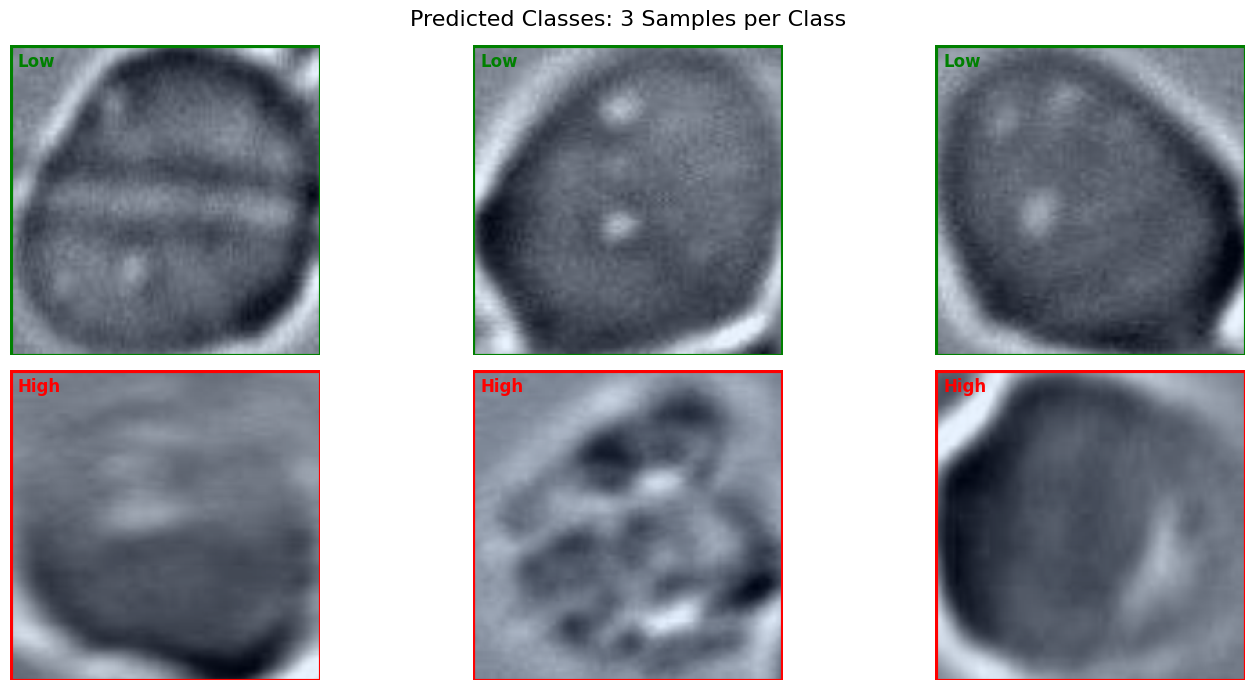

In [15]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from collections import defaultdict

# Load best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)
model.eval()

# Mapping for class labels and colors
dfi_labels = {0: "Low", 1: "High"}
dfi_colors = {0: 'green', 1: 'red'}

# Storage for class-wise samples
class_samples = defaultdict(list)

# Gather samples until we have 3 for each class
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        labels = labels.cpu().numpy()
        for img, pred in zip(images.cpu(), preds):
            if len(class_samples[pred]) < 3:
                class_samples[pred].append(img)
        if all(len(class_samples[c]) >= 3 for c in dfi_labels):
            break

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 7))  # 2 rows (Low & High), 3 samples each
axes = axes.flatten()

idx = 0
for class_id in sorted(dfi_labels.keys()):
    for img in class_samples[class_id]:
        image = img.permute(1, 2, 0).numpy()
        image = (image - image.min()) / (image.max() - image.min())

        color = dfi_colors[class_id]
        label_text = f"{dfi_labels[class_id]}"

        axes[idx].imshow(image)
        axes[idx].add_patch(plt.Rectangle((0, 0), image.shape[1], image.shape[0],
                                          edgecolor=color, facecolor='none', linewidth=3))
        axes[idx].text(5, 15, label_text, color=color, fontsize=12, weight='bold')
        axes[idx].axis('off')
        idx += 1

plt.suptitle("Predicted Classes: 3 Samples per Class", fontsize=16)
plt.tight_layout()
plt.show()
